# Import and setting

In [1]:
# ---------- import
import pickle

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd


from IPython.display import HTML    # for animation in jupyter lab

In [2]:
# ---------- figure size
plt.rcParams['figure.figsize'] =[8, 6]

# ---------- axes
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1.5

# ---------- ticks
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8.0
plt.rcParams['ytick.major.size'] = 8.0

# ---------- lines
plt.rcParams['lines.linewidth'] = 2.5

# ---------- grid
plt.rcParams['grid.linestyle'] = ':'

# ---------- font
plt.rcParams['font.size'] = 20
#plt.rcParams['pdf.fonttype'] = 42    # embed fonts in PDF using type42 (True type)

# Data

In [3]:
def load_pkl(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [4]:
rslt_data = load_pkl('./pkl_data/rslt_data.pkl')

# ---------- sort Selection
#rslt_data.head(10)

# ---------- sort by Energy
rslt_data.sort_values(by=['E_eV_atom']).head(10)

Spg_num Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom      Opt
0      117   P-4b2          117       P-4b2  -3.321734     NaN     done
6       31  Pmn2_1           31      Pmn2_1  -3.317501     NaN     done
1        4    P2_1            4        P2_1  -3.311716     NaN     done
4       85    P4/n          129      P4/nmm  -3.121548     NaN     done
9      148     R-3          148         R-3  -3.055297     NaN     done
2       90  P42_12          129      P4/nmm  -3.045123     NaN  not_yet
7      225   Fm-3m          225       Fm-3m  -3.038309     NaN     done
5      216   F-43m          216       F-43m  -2.885542     NaN     done
3      224   Pn-3m          224       Pn-3m  -2.687269     NaN     done
8      105  P4_2mc          105      P4_2mc  -2.665089     NaN     done

In [5]:
# ---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

# ---------- check success and error
nsuccess = rslt_data['E_eV_atom'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

# ---------- minimum
Emin = rslt_data['E_eV_atom'].min()
print('Emin: {} eV/atom'.format(Emin))

Number of data: 10
Success: 10
Error: 0
Emin: -3.3217338125 eV/atom


In [6]:
id_queueing, id_running, id_select_hist = load_pkl('pkl_data/LAQA_id_data.pkl')

In [7]:
tot_step_select, laqa_step, laqa_struc, laqa_energy, laqa_bias, laqa_score = load_pkl('./pkl_data/LAQA_data.pkl')

# Energy vs. trial

Text(0, 0.5, 'Energy (eV/atom)')

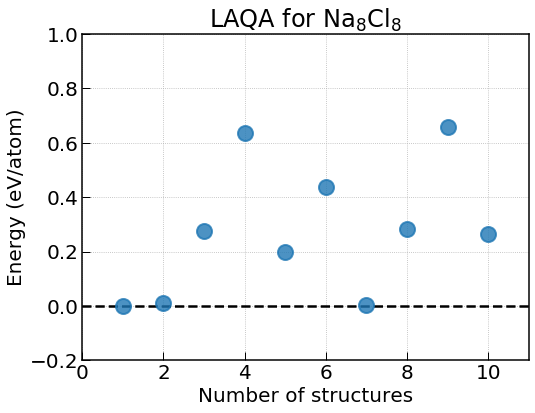

In [8]:
fig, ax = plt.subplots()

# ---------- axis
dx = 1
ax.set_xlim([0, ndata+dx])
ax.set_ylim([-0.2, 1])

# ---------- hline at zero
ax.hlines(0.0, -dx, ndata+dx, 'k', '--')

# ---------- plot
# x <-- ID + 1
ax.plot(rslt_data.index + 1, rslt_data['E_eV_atom'] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)

# ---------- title and label
ax.set_title('LAQA for Na$_{8}$Cl$_8$')
ax.set_xlabel('Number of structures')
ax.set_ylabel('Energy (eV/atom)')

In [9]:
# ---------- save figure
fig.savefig('Na8Cl8_LAQA.png', bbox_inches='tight')    # PNG
#fig.savefig('title_LAQA.png', bbox_inches='tight', dpi=300)    # high dpi PNG
#fig.savefig('title_LAQA.pdf', bbox_inches='tight')    # PDF

## LAQA process

In [10]:
# ---------- top 10
rslt_data.sort_values(by=['E_eV_atom']).head(10)

Spg_num Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom      Opt
0      117   P-4b2          117       P-4b2  -3.321734     NaN     done
6       31  Pmn2_1           31      Pmn2_1  -3.317501     NaN     done
1        4    P2_1            4        P2_1  -3.311716     NaN     done
4       85    P4/n          129      P4/nmm  -3.121548     NaN     done
9      148     R-3          148         R-3  -3.055297     NaN     done
2       90  P42_12          129      P4/nmm  -3.045123     NaN  not_yet
7      225   Fm-3m          225       Fm-3m  -3.038309     NaN     done
5      216   F-43m          216       F-43m  -2.885542     NaN     done
3      224   Pn-3m          224       Pn-3m  -2.687269     NaN     done
8      105  P4_2mc          105      P4_2mc  -2.665089     NaN     done

In [11]:
stable_IDs = [0, 6, 1]    # manual input

## Required optimization steps

In [12]:
id_done = rslt_data.index.values

In [13]:
# only completed structures
req_step = {}
tot_req_step = 0
for cID in id_done:
        req_step[cID] = sum(laqa_step[cID])
        tot_req_step += sum(laqa_step[cID])

In [14]:
# number of steps in each ID
req_step

{0: 193, 6: 142, 1: 186, 2: 110, 9: 132, 4: 193, 7: 159, 5: 18, 3: 17, 8: 297}

In [15]:
print('Total optimization steps:', sum(tot_step_select))
print('Total optimization steps for completed structures:', tot_req_step)
print('Number of completed structures:', len(id_done))    # include skip
print('Average number of optimization steps for completed structures:', tot_req_step/len(id_done))

Total optimization steps: 1447
Total optimization steps for completed structures: 1447
Number of completed structures: 10
Average number of optimization steps for completed structures: 144.7


## Energy vs. step for png figure

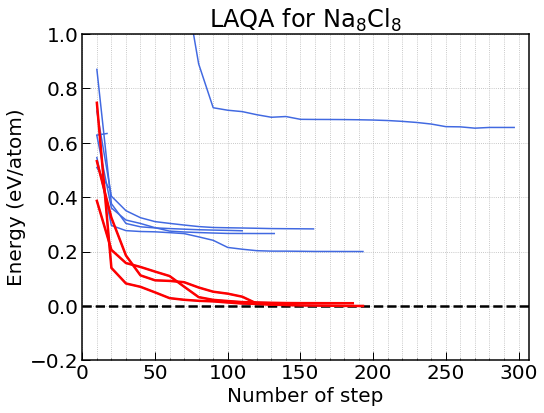

In [16]:
fig, ax = plt.subplots()

# ---------- axis
# ------ x axis
dx = 10
ax.set_xlim([0, max(req_step.values())+dx])
major_x = MultipleLocator(50)
minor_x = MultipleLocator(10)
ax.xaxis.set_major_locator(major_x)
ax.xaxis.set_minor_locator(minor_x)
# ------ y axis
ax.set_ylim([-0.2, 1.0])

# ---------- gird
ax.grid(which='minor')    # grid: major --> minor

# ---------- title and label
ax.set_title('LAQA for Na$_{8}$Cl$_8$')
ax.set_xlabel('Number of step')
ax.set_ylabel('Energy (eV/atom)')
#plt.tight_layout()

# ---------- hline at zero
ax.hlines(0.0, 0, max(req_step.values())+dx, 'k', '--')

# ---------- plot
# ------ not stalbe structures
for cID in range(len(laqa_energy)):
    if cID == stable_IDs:
        pass
    else:
        ax.plot(np.cumsum(laqa_step[cID]), laqa_energy[cID] - Emin, color='royalblue', linewidth=1.5)
# ------ stable structures, bring to front
for cID in stable_IDs:
    ax.plot(np.cumsum(laqa_step[cID]), laqa_energy[cID] - Emin, color='red')

In [17]:
# ---------- save figure
fig.savefig('Na8Cl8_LAQA.png', bbox_inches='tight')    # PNG
#fig.savefig('title_RS.png', bbox_inches='tight', dpi=300)    # high dpi PNG
#fig.savefig('title_RS.pdf', bbox_inches='tight')    # PDF

## Energy gif anime

In [18]:
laqa_energy[0][1] - Emin

0.13985075000000036

In [21]:
# ---------- figure
fig2, ax2 = plt.subplots()

# --------- initialize
lines = []
xdata = []
ydata = []
num_select = {}
for cID in range(len(laqa_energy)):
    xdata.append([laqa_step[cID][0]])
    ydata.append([laqa_energy[cID][0] - Emin])
    num_select[cID] = 0
    if cID in stable_IDs:
        lines.append(ax2.plot([], [], color='red')[0])
    else:
        lines.append(ax2.plot([], [], color='royalblue', linewidth=1.5)[0])

dx = 10   
ax2.set_xlim([0, max(req_step.values())+dx])
major_x = MultipleLocator(50)
minor_x = MultipleLocator(10)
ax2.xaxis.set_major_locator(major_x)
ax2.xaxis.set_minor_locator(minor_x)
ax2.grid(which='minor')    # grid: major --> minor
ax2.set_ylim([-0.2, 1.0])
ax2.set_title('LAQA for Na$_{8}$Cl$_8$')
ax2.set_xlabel('Number of step')
ax2.set_ylabel('Energy (eV/atom)')
ax2.hlines(0.0, 0, max(req_step.values())+dx, 'k', '--')


def init():
    return lines

# ---------- animate function
# frame i --> 0, 1, 2, ...
def animate(i):
    for cID in id_select_hist[i]:
        num_select[cID] += 1
        xdata[cID].append(laqa_step[cID][num_select[cID]])
        ydata[cID].append(laqa_energy[cID][num_select[cID]] - Emin)
        lines[cID].set_data(np.cumsum(xdata[cID]), ydata[cID])
    return lines


# ---------- call the animator
anim = FuncAnimation(fig2, animate, init_func=init, frames=len(id_select_hist), blit=True)
plt.close()    # not to show figure, only animation

# only choose one, save gif or show here
#anim.save('Na8Cl8_LAQA.gif',  writer='imagemagick')
HTML(anim.to_jshtml())